<a href="https://colab.research.google.com/github/Yohann20/PS_IAMLDL_Matus_Yohann/blob/main/MCHLN_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificar el genero de canciones utilizando metricas de audio.**
En este proyecto se utiliza el modelo de Arbol de decision y SVM para determinar el genero de canciones usando metricas de analisis audio para clasificarlas, para el desarrollo de este proyecto se realizaron los siguientes pasos:

1. **Cargar los datasets:**

Primeramente se cargan los dataset y se realiza su lectura, en cuanto a los datasets utilizados se tiene que:

*   CSV DE FMA: El dataset CSV de FMA contiene metadatos de las canciones de rock y hiphop, tales como título, artista, género, duración, etc.

*   JSON DE ECHONEST: El dataset JSON de EchoNest contiene métricas de análisis de audio, como tempo, clave, modo, valencia, energía, etc.

2. **Union de dataset**

Para el analisis se realizo una union entre ambos dataset donde, la etiqueta "track_id", determina la correlacion entre variables.

3. **Preprocesamiento de datos**

Para el procesamiento de datos, se normalizan los datos estandarizandolos, esto permite identificar las direcciones de mayor varianza considerando todas las características de manera equitativa.  
Luego para reducir y simplificar los datos, se utiliza un metodo PCA (Analisis de Componentes Principales) lo que permite transformar el conjunto de datos para que tenga menor dimension conservando la variabilidad e informacion de los datos originales.



In [ ]:
import pandas as pd


In [ ]:
# Lectura de data
data = pd.read_csv("fma-rock-vs-hiphop.csv")

# Lectura de metricas de data y etiquetas
echonest_metrics = pd.read_json("echonest-metrics.json", precise_float=True)

# Merge con columnas de dataset
echo_data = echonest_metrics.merge(data[["track_id","genre_top"]],on="track_id")

In [ ]:
# Resultados del dataset (Union de columnas)
echo_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split

# Crear datos
datos = echo_data.drop(["genre_top","track_id"],axis=1).values

# Crear Etiquetas
etiquetas = echo_data["genre_top"].values

# Division de datos
train_datos, test_datos, train_etiquetas, test_etiquetas = train_test_split(datos,etiquetas,random_state = 10)


# Normalizacion de dataset.

Para el procesamiento de datos se normaliza el dataset, este proceso transforma las caracteristicas del dataset para que tengan una media  de 0 y una desviacion estandar de 1.
Debido a que se usara **PCA** (Analisis de componente principal) garantiza que todas las caracteristias de los datos contribuyan de manera equitativa y no dominen debido a diferencias en escalas.

Gracias a la normalizacion, datos que pueden tener diferentes unidades de medida las lleve a una escala comun y mejora el rendimiento del algoritmo PCA.


In [ ]:
# Preprocesamiento y Normalizacion del dataset
from sklearn.preprocessing import StandardScaler
# Scaler a train y test datos
scaler = StandardScaler()
scaled_train_datos = scaler.fit_transform(train_datos)
scaled_test_datos = scaler.transform(test_datos)

# Analisis de Componentes principales (PCA)

PCA es una tecnica de reduccion de dimensionalidad que transforma un conjunto de datos de muchas dimensiones a un nuevo conjunto de datos con menos dimensiones, manteniendo la mayor cantidad posible de la variabilidad original del dataset.

Gracias a este algoritmo se logra simplificar el dataset, ayuda a concentrarse en las caracteristicas que contribuyen a la variabilidad del dataset y mejora rendimiento.

In [ ]:
# Importar PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Realizar PCA
pca = PCA()
pca.fit(scaled_train_datos)
exp_variance = pca.explained_variance_ratio_


# Varianza explicada acumulada

La varianza explicada acumulada es una medida que se utiliza en el Análisis de Componentes Principales (PCA) para entender cuánta información (o varianza) de los datos originales se retiene a medida que se incluyen más componentes principales.

En este punto se determina el numero de componentes principales y se calcula la varianza explicada acumulada, esto ayudará a determinar los parametros de PCA y proporciona una idea de cuanta varianza total se explica al considerar los componentes principales.  

En el siguiente grafico se muestra la varianza explicada acumulada, se traza el eje y con **"cum_exp_variance"** y el eje x con el numero de componentes principales. Además, se dibuja una linea en el 0.90 (de forma arbitraria) que indica el punto donde se explica el 90% de la varianza total.

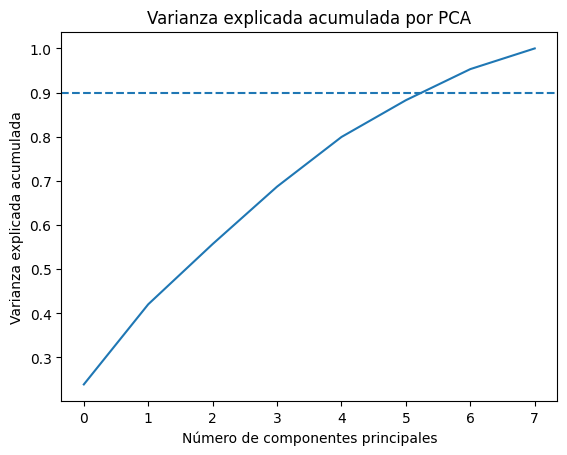

In [ ]:

import numpy as np

# Determinar numero de componentes principales
cum_exp_variance = np.cumsum(exp_variance)

# Graficar la varianza explicada y una linea en 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.90, linestyle='--')
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.show()

PCA

Analizando el grafico, se puede determinar que con 90% de varianza la cantidad de componentes principales necesarios para aplicar el algoritmo, en este caso es 6 (indice comienza de 0) y se especifica en los parametros de PCA.



In [ ]:
# Realizar PCA con numero de componentes seleccionado
pca = PCA(n_components=6)
train_pca = pca.fit_transform(scaled_train_datos)
test_pca = pca.transform(scaled_test_datos)

# Arbol de decision

El primer modelo utilizado es el de Arbol de decision, a continuacion se muestra la prediccion de etiquetas, su nivel de precision y matriz de confusion.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar con arbol de decision
tree = DecisionTreeClassifier(random_state =10)
tree.fit(train_pca,train_etiquetas)

# Predecir las etiquetas para los datos de prueba
pred_labels_tree = tree.predict(test_pca)
print(pred_labels_tree)

['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Rock' 'Rock']


In [ ]:
from sklearn.metrics import accuracy_score
# Calcular y mostrar el score
accuracy = accuracy_score(test_etiquetas, pred_labels_tree)
print(f"Precision: {accuracy}")

Precision: 0.8534554537885096


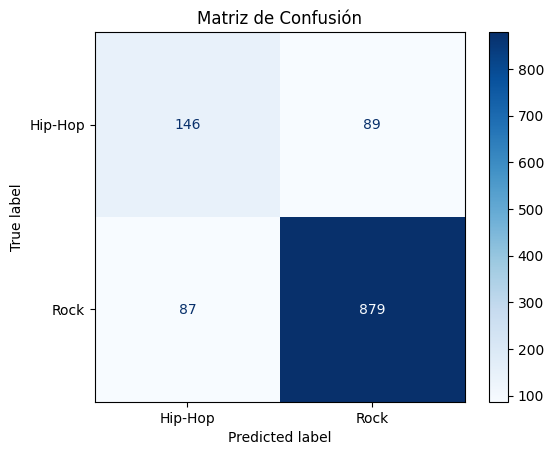

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(test_etiquetas, pred_labels_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Reporte de precision

 Estos datos representan el rendimiento del modelo de Árbol de Decisión aplicado al conjunto de prueba, utilizando las métricas de precisión para las clases "Hip-Hop" y "Rock".


*   Para Hip-hop, se registra un 63% de predicciones correctas.
*   Para Rock, se registra un 91% de predicciones correctas.
*   La precision general del modelo es del 85%.






In [ ]:
# Reporte de clasificacion del modelo de arbol de decision
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_etiquetas,pred_labels_tree)
print("Arbol de Decision: \n", class_rep_tree)

Arbol de Decision: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201



# Modelo SVM

El segundo modelo a entrenar es el de SVM (Maquina de soporte vectorial), a continuacion se muestra la prediccion de etiquetas, su nivel de precision y matriz de confusion

In [ ]:
from sklearn.svm import SVC

# Entrenar con SVM
svm = SVC(kernel='linear', random_state=10)
svm.fit(train_pca, train_etiquetas)

# Predecir las etiquetas para los datos de prueba
pred_labels_svm = svm.predict(test_pca)
print(pred_labels_svm)

['Rock' 'Rock' 'Rock' ... 'Rock' 'Rock' 'Rock']


Precision del SVM: 0.8792672772689425


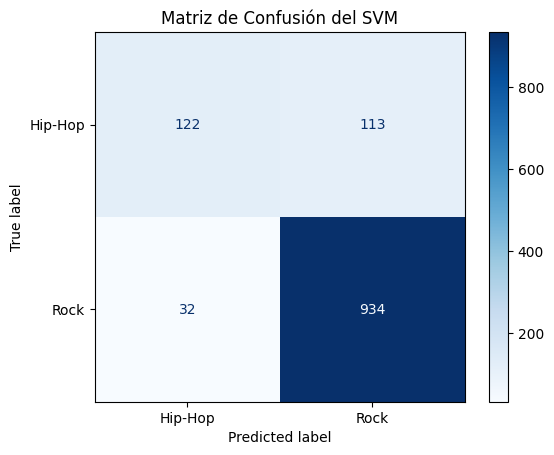

In [ ]:
# Calcular y mostrar el score
accuracy_svm = accuracy_score(test_etiquetas, pred_labels_svm)
print(f"Precision del SVM: {accuracy_svm}")

# Calcular y mostrar la matriz de confusión
conf_matrix_svm = confusion_matrix(test_etiquetas, pred_labels_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión del SVM")
plt.show()

# Reporte de precision

Estos datos representan el rendimiento del modelo de SVM aplicado al conjunto de prueba, utilizando las métricas de precisión para las clases "Hip-Hop" y "Rock".


*   Para Hip-hop, se registra un 79% de predicciones correctas.
*   Para Rock, se registra un 89% de predicciones correctas.
*   La precision general del modelo es del 88%.






In [ ]:
# Reporte de clasificacion del modelo de SVM
class_rep_svm = classification_report(test_etiquetas, pred_labels_svm)
print("SVM: \n", class_rep_svm)

SVM: 
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.52      0.63       235
        Rock       0.89      0.97      0.93       966

    accuracy                           0.88      1201
   macro avg       0.84      0.74      0.78      1201
weighted avg       0.87      0.88      0.87      1201



# Conclusion.

Al comparar los resultados de los modelos de Árbol de Decisión y Máquina de Vectores de Soporte (SVM) tenemos los siguientes datos:

**Precisión:**

El Árbol de Decisión muestra una precisión del 63% para "Hip-Hop" y del 91% para "Rock".
El SVM presenta una mayor precisión para "Hip-Hop" (79%) y una precisión similar para "Rock" (89%).

**Exactitud General:**

La exactitud del Árbol de Decisión es del 85%.
La exactitud del SVM es ligeramente superior, alcanzando el 88%.

Analizando estos datos tenemos que ambos modelos representan diferencias de precision con las etiquetas de manera individual pero el modelo SVM proporciona un mejor rendimiento general que el Arbol de decision por lo que, comparando con el modelo de Arbol de decision es la mejor opcion para la clasificacion de generos musicales.